In [1]:
# winner_model.py

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier

# Load the data
data = pd.read_csv('Data1.csv')

# Separate features and target
X = data.drop(columns=['Rated_(T/F)', 'Winner', 'Game_Status'])  # Drop Winner as target, and others as they are not features
y = data['Winner']

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction (optional, can be skipped if you don't need PCA)
pca = PCA(n_components=5)  # Adjust based on your data
X_pca = pca.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM (Linear)": SVC(kernel='linear', probability=True)
}

# Evaluate each model using the test data
for model_name, model in models.items():
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))

Model: Decision Tree
              precision    recall  f1-score   support

       black       0.54      0.50      0.52       803
        draw       0.12      0.13      0.12        71
       white       0.57      0.61      0.59       871

    accuracy                           0.54      1745
   macro avg       0.41      0.41      0.41      1745
weighted avg       0.54      0.54      0.54      1745

Model: Logistic Regression
              precision    recall  f1-score   support

       black       0.65      0.52      0.57       803
        draw       0.75      0.04      0.08        71
       white       0.60      0.76      0.67       871

    accuracy                           0.62      1745
   macro avg       0.67      0.44      0.44      1745
weighted avg       0.63      0.62      0.60      1745

Model: Random Forest
              precision    recall  f1-score   support

       black       0.61      0.57      0.59       803
        draw       0.43      0.04      0.08        71
      

c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

### Before *Hyper_Tuning*
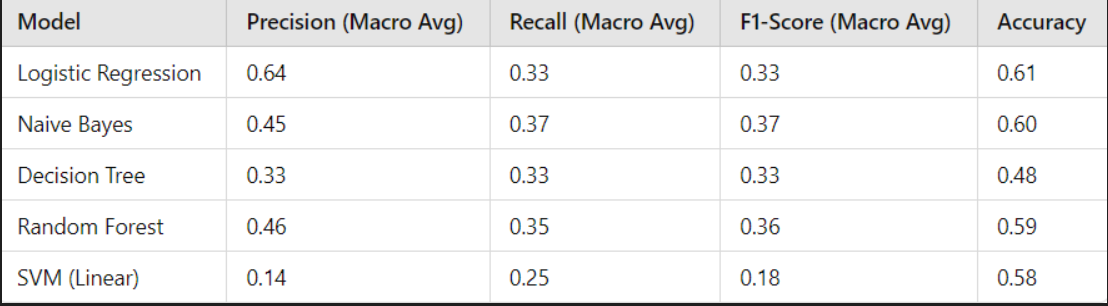